In [7]:
#grpc call graph
#rpc

In [8]:
import pandas as pd
import numpy as np
import os

In [9]:
file_name = "housing.csv"

In [10]:
if os.path.exists(file_name):
    pass
else:
    !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

In [11]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [12]:
len(data)

20640

In [13]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [15]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

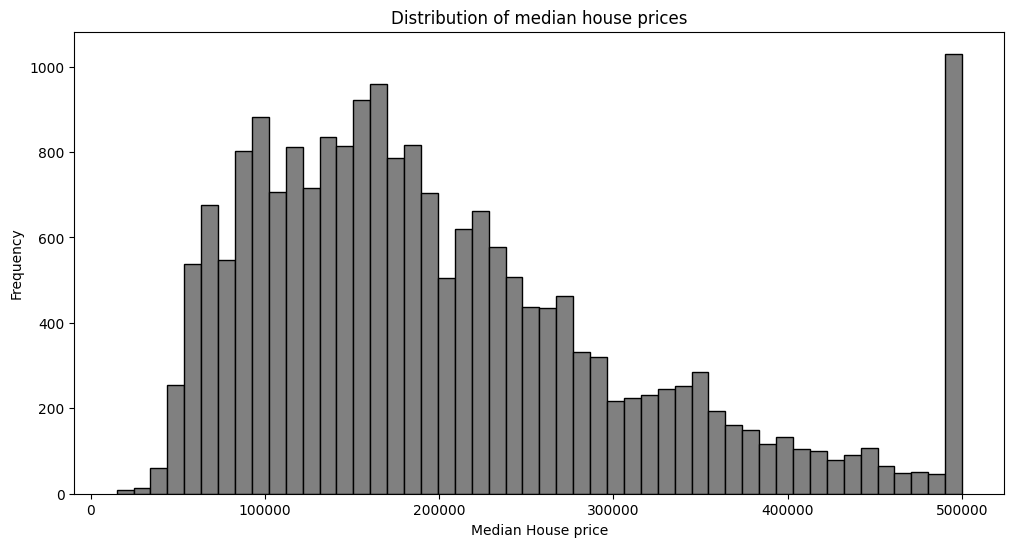

In [17]:
plt.figure(figsize=(12,6))
sns.histplot(data.median_house_value, bins=50, color='grey',alpha = 1)
plt.ylabel('Frequency')
plt.xlabel('Median House price')
plt.title('Distribution of median house prices')
plt.show()

In [18]:
data['ocean_proximity'].unique()
# data[data.ocean_proximity.isin(['<1H OCEAN','INLAND'])]
df = data[(data.ocean_proximity == '<1H OCEAN') | (data.ocean_proximity == 'INLAND')]
# df.ocean_proximity.unique()
len(df)

15687

In [19]:
data[data.ocean_proximity.isin(['<1H OCEAN','INLAND'])]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [20]:
df2 = df.copy().drop('ocean_proximity',axis=1)
df2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


In [21]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN


In [22]:
# Question 1 -> There's one feature with missing values. What is it?

for col in df.columns:
    if df[col].isnull().any():
        print(col)

total_bedrooms


In [23]:
### Question 2 -> What's the median (50% percentile) for variable `'population'`?

df2.population.median()

1195.0

In [24]:
np.random.seed(42)

n = len(df2)
#Splitting data into train/val/test sets, with 60%/20%/20% distribution.
n_val = int(n * .2)
n_test = int(n * .2)
n_train = n - (n_val + n_test)

#Shuffling dataset

idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df2.iloc[idx]

df_train = df_shuffled.iloc[:n_train]
df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [25]:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values


y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [26]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875
1,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125
2,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301
3,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422
4,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306
...,...,...,...,...,...,...,...,...
9408,-119.15,34.44,33.0,2005.0,392.0,1043.0,351.0,5.3080
9409,-119.13,36.13,28.0,1673.0,385.0,1434.0,371.0,2.0586
9410,-118.08,34.13,46.0,1238.0,147.0,377.0,145.0,8.4546
9411,-118.46,34.29,24.0,3668.0,890.0,3151.0,810.0,3.0526


In [27]:
df_train.total_bedrooms.isnull().sum()

94

In [28]:
# Question 3

#option 1 -> Fill with 0
# zero_fill = 0
# df_train['total_bedrooms'] = df_train.total_bedrooms.fillna(0)

#Option 2 -> Fill with mean
df_test.total_bedrooms.isnull().sum()
mean_val = df_train['total_bedrooms'].mean()
df_train['total_bedrooms'] = df_train['total_bedrooms'].fillna(mean_val)
df_train.total_bedrooms.isnull().sum()


0

In [29]:
#Linear regression without regularization
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]


In [30]:
df_train.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [31]:
X_train = df_train
w_0, w = train_linear_regression(X_train,y_train)

In [34]:
w

array([-2.57026361e-01, -2.68652914e-01,  1.79880767e-03, -3.87631029e-05,
        3.78806885e-04, -1.49641599e-04,  3.25344392e-04,  1.81951358e-01])

In [26]:
y_pred = w_0 + X_train.dot(w)
y_pred

0       11.481485
1       12.142045
2       12.451484
3       11.959550
4       11.894252
          ...    
9408    12.540202
9409    11.439026
9410    12.913943
9411    11.934661
9412    12.112811
Length: 9413, dtype: float64

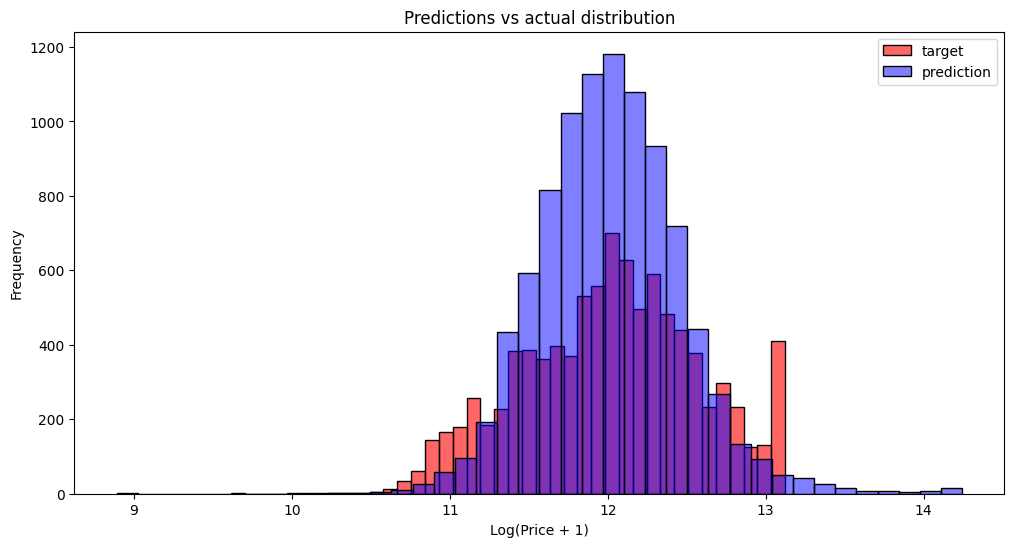

In [27]:
plt.figure(figsize=(12,6))

sns.histplot(y_train,label='target',color='red',alpha = .6,bins = 40)
sns.histplot(y_pred,label='prediction',color='blue',alpha = .5,bins = 40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')
plt.show()

In [28]:
from sklearn.metrics import root_mean_squared_error as rmse

rmse(y_train,y_pred)

0.34003008222642606

In [29]:
df_val.isnull().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        29
population             0
households             0
median_income          0
dtype: int64

In [30]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875
1,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125
2,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301
3,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422
4,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306
...,...,...,...,...,...,...,...,...
9408,-119.15,34.44,33.0,2005.0,392.0,1043.0,351.0,5.3080
9409,-119.13,36.13,28.0,1673.0,385.0,1434.0,371.0,2.0586
9410,-118.08,34.13,46.0,1238.0,147.0,377.0,145.0,8.4546
9411,-118.46,34.29,24.0,3668.0,890.0,3151.0,810.0,3.0526


In [34]:
mean_val = df_val['total_bedrooms'].mean()
df_val['total_bedrooms']= df_val['total_bedrooms'].fillna(mean_val)
X_val = df_val

In [35]:
X_val

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-120.09,37.02,9.0,1608.0,297.000000,1057.0,295.0,3.7143
1,-117.88,33.84,34.0,1410.0,214.000000,837.0,240.0,6.1168
2,-118.21,33.95,32.0,1116.0,328.000000,1265.0,302.0,2.2950
3,-119.32,36.32,29.0,2409.0,436.000000,1142.0,440.0,3.6895
4,-117.11,33.14,10.0,3208.0,636.000000,1395.0,582.0,3.4455
...,...,...,...,...,...,...,...,...
3132,-119.02,36.07,29.0,2610.0,597.000000,1659.0,571.0,1.5911
3133,-122.10,40.03,25.0,2516.0,534.986486,1266.0,494.0,1.7566
3134,-118.04,34.00,30.0,5308.0,854.000000,2114.0,838.0,5.1985
3135,-118.15,34.10,36.0,3514.0,818.000000,2277.0,828.0,3.1211


In [36]:
y_pred = w_0 + X_val.dot(w)
round(rmse(y_val, y_pred ),2)

0.34

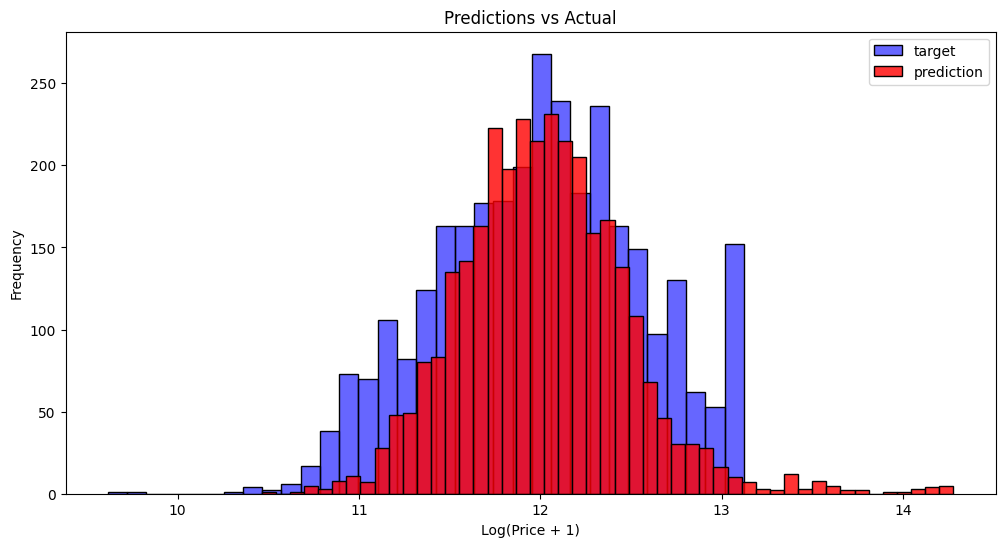

In [37]:
plt.figure(figsize=(12,6))

sns.histplot(y_val, label='target',alpha=0.6,color='blue')
sns.histplot(y_pred, label='prediction',alpha=0.8,color='red')

plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')
plt.title('Predictions vs Actual')
plt.legend()
plt.show()

In [39]:
#Question 4

def train_linear_regression_reg(X, y, r=0.0):
   
   ones = np.ones(X.shape[0])
   X = np.column_stack([ones, X])

   XTX = X.T.dot(X)
   reg = r * np.eye(XTX.shape[0])
   XTX = XTX + reg

   XTX_inv = np.linalg.inv(XTX)
   w = XTX_inv.dot(X.T).dot(y)
    
   return w[0], w[1:]

In [40]:
from IPython import display

In [42]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train,y_train,r=r)
    # print(f'{r,round(w_0,2),round(w[13],2),round(w[21],2)}')
    print(f'{r,round(w_0,2),len(w)}')

(0, -9.89, 8)
(1e-06, -9.89, 8)
(0.0001, -9.88, 8)
(0.001, -9.87, 8)
(0.01, -9.68, 8)
(0.1, -8.15, 8)
(1, -3.16, 8)
(5, -0.85, 8)
(10, -0.44, 8)
